In [1]:
# Impurity Cleanup

import pandas as pd
import re

# Config
pd.set_option('display.max_colwidth', None)
input_path = "pradyot3.tsv"

# Regex ranges:
DEVANAGARI = r'[\u0900-\u097F]'   # Hindi script
ASSAMESE   = r'[\u0980-\u09FF]'   # Assamese script

patterns = [
    r'\?{2,}',      # multiple question marks
    r'\.{3,}',      # multiple dots
    r'!{2,}',       # multiple exclamation points
    r'<[^>]*>?',    # any tags
    r'�',           # replacement char
]

def has_impurity(text):
    return any(re.search(p, str(text)) for p in patterns)

def clean_text(text):
    out = str(text)
    for p in patterns:
        out = re.sub(p, "", out)
    # Remove leading and trailing double quotes
    out = out.strip().strip('"')
    return out

# LOAD (one‑split to avoid concat issues)
rows = []
with open(input_path, encoding="utf-8") as f:
    for line in f:
        a, b = (line.rstrip("\n").split("\t", 1) + [""])[:2]
        rows.append((a, b))
df = pd.DataFrame(rows, columns=["asm","eng"])
print(f"Loaded {len(df)} rows\n")

# DETECT & CLEAN PUNCTUATION IMPURITIES
mask_impure = df['asm'].apply(has_impurity) | df['eng'].apply(has_impurity)
print(f"Impure rows (by punctuation): {mask_impure.sum()}")

print("\n--- BEFORE cleaning ---")
display(df.loc[mask_impure, ["asm","eng"]])

df.loc[mask_impure, "asm"] = df.loc[mask_impure, "asm"].apply(clean_text)
df.loc[mask_impure, "eng"] = df.loc[mask_impure, "eng"].apply(clean_text)

print("\n--- AFTER cleaning ---")
display(df.loc[mask_impure, ["asm","eng"]])


# SHOW mixed‐script in English (for review only)
mask_mixed_eng = df['eng'].str.contains(ASSAMESE, regex=True) | df['eng'].str.contains(DEVANAGARI, regex=True)
print(f"\nRows where English column contains Assamese or Hindi script: {mask_mixed_eng.sum()}")
display(df.loc[mask_mixed_eng, ["asm","eng"]])

Loaded 9989 rows

Impure rows (by punctuation): 156

--- BEFORE cleaning ---


,asm,eng
39,দেশত পুনৰ আন এজন লোক আক্ৰান্ত কোৰোনাৰ নতুন ভেৰিয়েন্ট XEত...,"The new variant of Corona XE, which has infected another person in the country, has..."
100,দুয়ো সম্বন্ধত পিতৃ-কন্যা বুলি জানিব পৰা গৈছে।,"The two are known to be father-daughter in relationship. < ref name = ""pildat / dob"" > < / ref > < ref name = ""dob / dob / dob / dob"" > < ref name = ""dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob"
119,নেদেখা দেশত কুশলে থাককগৈ জ্যোৎস্না ৰহমান…আপোনালৈ একাঁজলি শ্ৰদ্ধাঞ্জলি….,Stay safe in the land of the blind Jyotsna Rahman... a humble tribute to you...
225,মুখ্যমন্ত্ৰী হিমন্ত বিশ্ব শৰ্মাৰ বিৰুদ্ধে গোচৰ ৰুজু কৰিবলৈ নিৰ্দেশ দিছপুৰ আৰক্ষীক...,Dispur Police directed to register case against Chief Minister Himanta Biswa Sarma
237,‘দেশক এদিন বিশ্বশ্ৰেষ্ঠ কৰিব নেকি’ শীৰ্ষক লেখাত বিশিষ্ট সাংবাদিক প্ৰকাশ মহন্তই তথ্যগতভাৱে কিছু চিন্তাৰ খোৰাক দিছে।,"In an article titled'Will the country one day become the world's best ', noted journalist Prakash Mahanta has given some thought to the topic in a matter-of-fact manner....????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????"
...,...,...
9408,হোলীৰ পাৰ্টীৰ নামত যুৱতীৰ লগত উদ্ভাণ্ডলী...,"In the name of Holi party, misbehave with young girls..."
9418,এগৰাকী পঞ্চায়ত সভানেত্ৰীৰ দৰে সামাজিক দায়িত্বত থকা মহিলাই ফেচবুক ষ্টেটাচটোত লিখা লেতেৰা শব্দটোৱে যে অন্তত: ৰাজনৈতিক ক্ষেত্ৰৰ লোকসকলৰ পোছাক পৰিচ্ছদৰ কথাটো বুজোৱা নাই সেইটো নিশ্চিত।,"It is certain that the dirty words written in the Facebook status, by a socially responsible woman like a panchayat president, do not at least refer to the dress code of people in the political arena....?????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????"
9488,"প্ৰতিবাদক অংগুষ্ঠ প্ৰদৰ্শন কৰি কেন্দ্ৰীয় বিজেপি চৰকাৰে কা’ৰ সমৰ্থনত অনুষ্ঠিত কৰিছে সভা, সমদল।","Showing solidarity with the protest, the central BJP government has held meetings, rallies in support of whom???????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????"
9614,আৰক্ষী সঞ্চালক প্রধান হৈ থকা সময়তে কুলধৰ শইকীয়াৰ এক সাক্ষাৎকাৰ গ্ৰহণ কৰা হৈছিল।,"An interview of Kuladhar Saikia was conducted when he was the Director-General of Police (DGP). < ref name = ""pildat / dob"" > < / ref > < ref name = ""dob / dob"" > < ref name = ""dob / dob / dob / dob / dob / dob / dob / dob"" > < / ref > < ref name = ""dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob / dob"



--- AFTER cleaning ---


,asm,eng
39,দেশত পুনৰ আন এজন লোক আক্ৰান্ত কোৰোনাৰ নতুন ভেৰিয়েন্ট XEত,"The new variant of Corona XE, which has infected another person in the country, has"
100,দুয়ো সম্বন্ধত পিতৃ-কন্যা বুলি জানিব পৰা গৈছে।,The two are known to be father-daughter in relationship.
119,নেদেখা দেশত কুশলে থাককগৈ জ্যোৎস্না ৰহমান…আপোনালৈ একাঁজলি শ্ৰদ্ধাঞ্জলি….,Stay safe in the land of the blind Jyotsna Rahman a humble tribute to you
225,মুখ্যমন্ত্ৰী হিমন্ত বিশ্ব শৰ্মাৰ বিৰুদ্ধে গোচৰ ৰুজু কৰিবলৈ নিৰ্দেশ দিছপুৰ আৰক্ষীক,Dispur Police directed to register case against Chief Minister Himanta Biswa Sarma
237,‘দেশক এদিন বিশ্বশ্ৰেষ্ঠ কৰিব নেকি’ শীৰ্ষক লেখাত বিশিষ্ট সাংবাদিক প্ৰকাশ মহন্তই তথ্যগতভাৱে কিছু চিন্তাৰ খোৰাক দিছে।,"In an article titled'Will the country one day become the world's best ', noted journalist Prakash Mahanta has given some thought to the topic in a matter-of-fact manner"
...,...,...
9408,হোলীৰ পাৰ্টীৰ নামত যুৱতীৰ লগত উদ্ভাণ্ডলী,"In the name of Holi party, misbehave with young girls"
9418,এগৰাকী পঞ্চায়ত সভানেত্ৰীৰ দৰে সামাজিক দায়িত্বত থকা মহিলাই ফেচবুক ষ্টেটাচটোত লিখা লেতেৰা শব্দটোৱে যে অন্তত: ৰাজনৈতিক ক্ষেত্ৰৰ লোকসকলৰ পোছাক পৰিচ্ছদৰ কথাটো বুজোৱা নাই সেইটো নিশ্চিত।,"It is certain that the dirty words written in the Facebook status, by a socially responsible woman like a panchayat president, do not at least refer to the dress code of people in the political arena"
9488,"প্ৰতিবাদক অংগুষ্ঠ প্ৰদৰ্শন কৰি কেন্দ্ৰীয় বিজেপি চৰকাৰে কা’ৰ সমৰ্থনত অনুষ্ঠিত কৰিছে সভা, সমদল।","Showing solidarity with the protest, the central BJP government has held meetings, rallies in support of whom"
9614,আৰক্ষী সঞ্চালক প্রধান হৈ থকা সময়তে কুলধৰ শইকীয়াৰ এক সাক্ষাৎকাৰ গ্ৰহণ কৰা হৈছিল।,An interview of Kuladhar Saikia was conducted when he was the Director-General of Police (DGP).



Rows where English column contains Assamese or Hindi script: 22


,asm,eng
622,"তেওঁ শ্বেয়াৰ মাৰ্কেটত ১৭.৫৯কোটি টকা জমা দিয়ে, আৰু তেওঁৰ পত্নী সোনল শ্বাহে ৪.৩৬ কোটি টকা জমা দিয়ে।","He puts 17.59কোটি in the share market, and his wife Sonal Shah puts in ₹4.36 crore."
1358,দমন আৰু দিউ ০.৫৫ (প্ৰথম) পুডুচেৰী ০.২৭ আন্দামান আৰু নিকোবৰ দ্বীপপুঞ্জ ০.৩৩ (তৃতীয়) চণ্ডীগড় ০.২৯ লক্ষাদ্বীপ ০.২১ দদ্ৰা আৰু নগৰ হাৱেলী ০.৪৯ (দ্বিতীয়) দিল্লী ০.২৩ন্যায়িক আৰু ৰাজহুৱা সুৰক্ষাৰ ক্ষেত্ৰত কেন্দ্ৰীয় চৰকাৰে প্ৰস্তুত কৰা good governance indexৰ প্ৰথম স্থানত থকা ৰাজ্যখন হৈছে তামিলনাডু।,Daman and Diu 0. 55 (1st) Puducherry 0. 27 Andaman and Nicobar Islands 0. 33 (3rd) Chandigarh 0. 29 Lakshadweep 0. 21 Dadra and Nagar Haveli 0. 49 (2nd) Delhi 0.23ন্যায়িক and Tamil Nadu is the first state in the good governance index prepared by the central government in terms of public safety.
1452,"এই অনুষ্ঠানতে শিক্ষাবিদ যোগেন্দ্ৰ কলিতা,বিভুষ সেন ডেকা,ৰজত কলিতা,নলবাৰীৰ প্ৰাক্তন পৌৰপতি চন্দ্ৰ কলিতা,প্ৰাক্তন শিক্ষা বিষয়া দীপকৰ কলিতা, চামচুল হক চৌধুৰী,যুৱ নেতা দিগন্ত চৌধুৰী,শিক্ষাবিদ মহেশ্বৰ বৰ্মা,আদিক.সম্বৰ্ধনা জনোৱা হয়।","The event was attended by educationists Yogendra Kalita, Bibhushan Sen Deka, Rajat Kalita, ex-municipal of Nalbari Chandra Kalita, ex-education officer Dipakar Kalita, Shamsul Haque Choudhury, youth leader Diganta Choudhury, educationist Maheswar Verma, আদিক.সম্বৰ্ধনা."
1720,"অৱৰোধকাৰী দলটোৱে অশোক শৰ্মা মূৰ্দাবাদ, অসম চৰকাৰ হায় ! হায়, CAA আমাক নালাগে , অশোক শৰ্মাই নিজৰ স্থিতি স্পষ্ট কৰক, মুখ্যমন্ত্ৰী হায় হায়, আৰ এছ.এছ হুচিয়াৰ আদি শ্লগানেৰে পৰিৱেশ উত্তাল কৰি তোলে ।","The group of protesters raised slogans like Ashok Sharma murdabad, Assam government hai! Hai, CAA us nahi hai, Ashok Sharma clear his stand, CM hai hai, R এছ.এছ Hoshiyar etc."
1827,"ইপিনে নৰ্মালত অবৈধ নাম ভৰ্ত্তিক কেন্দ্ৰ কৰি হৈ থকা খেলি-মেলি কাৰ্য-কলাপৰ সন্দৰ্ভত ২০১৭-১৯ বৰ্ষৰ ডি.এল.এড (ODL)ৰ সমন্বয়কৰ দায়িত্বত থকা শিক্ষয়িত্ৰী অপৰাজিতা বুঢ়াগোহাঁই, শিক্ষক জীৱন গগৈ, কৰ্মচাৰী-ব্ৰজেন বৰুৱা, প্ৰণৱ নেওগ ইত্যাদিৰ সৈতেও বিষয় সন্দৰ্ভত বাৰ্তালাপ কৰে দুইগৰাকী তদন্তকাৰী বিষয়াই।","At the same time, two investigating officers also talked to the coordinator of the 2017-19 year of ডি.এল.এড (ODL), Aprajita Budagorik, teacher Jeevan Gogoi, staff - Brajen Baruah, Pranab Neog, etc."
3050,প্ৰতিটোতে থকা কৃষি উন্নয়ন বিষয়া গৰাকীক আকৌ নিয়োগ কৰা হৈছে এন.আৰ.চি.ৰ কামত।,The Agriculture Development Officer in each has been reassigned to the এন.আৰ.চি.ৰ job.
3103,“কম্প্ৰিহেনচিভ ইনটিগ্ৰেডেড বোৰ্ডাৰ মেনেজমেন্ট চিচটেম” ( চি. আই.বি.এম.চি.) নামৰ এক আঁচনীৰ অধীনত নিৰ্মাণ কৰি উলিওৱা বোল্ড-ক্যুইট (BOLD-QIT :- Border electronically dominated quick response team interception technique) নামৰ অত্যাধুনিক সেই পদ্ধতিৰ সহায়ত ধুবুৰীৰ বিন্নাচৰাৰ পৰা মানকাচৰৰ শিশুমাৰালৈ প্ৰায় ৬১ কিলোমিটাৰ দৈৰ্ঘ্যৰ ভাৰত-বাংলাদেশ সীমান্তত এক কটকটীয়া নিৰাপত্তা বেহু গঢ়ি তোলা সম্ভৱ হ’ব বুলি দাৱী কৰা পোৱা গৈছিল সীমান্ত সুৰক্ষা বাহিনী (বি এছ এফ)য়ে৷,"The Border Security Force (BSF) has claimed that the BOLD-QIT (Border Electronically Dominated Quick Response Team Interception Technique), developed under the ""Comprehensive Integrated Border Management System"" (C আই.বি.এম.চি.), is a state-of-the-art system to create a tight security barrier along the 61 km long India-Bangladesh border from Binnasara in Dhubri to Shishumara in Mankachar."
4226,অনুষ্ঠান বিশিষ্ট অতিথি হিচাপে.বনভাগ মহাবিদ্যালয় অধ‍্যক্ষ যোগেন্ৰ কলিতা.অংশগ্ৰহণ কৰি ভাষণত কয় যে কৃতিমান ছাত্র ছাত্ৰীসকলে যাতে সময়ৰ সোঁতত উটি ভাহি নগৈ ভৱিষ্যত সমাজ তথা দেশৰ মংগলৰ বাবে কাম কৰি যাব পাৰে তাৰ বাবে আহ্বান জনায়।,"Guest of Honour হিচাপে.বনভাগ College Principal Yogendra কলিতা.অংশগ্ৰহণ, in his speech, called upon the meritorious students to work for the betterment of the society and the country in the future rather than floating in the mists of time."
4618,"চতুৰ্থ ৰাউণ্ডত বিজেপিৰ ভুবন গামে ৫১৭৫ টা,অসম জাতীয় পৰিষদৰ চিত্তৰঞ্জন বসুমতাৰীয়ে ২০৩৮ টা আৰু এছ.ইউ.চি.আই কমিউনিষ্ট দলৰ ভাইটি ৰিচঙে ১৪৪ টা ভোট লাভ কৰে।","In the fourth round, Bhuban Gam of the BJP received 5175 votes, Chittaranjan Basumatary of the Assam Jatiya Parishad received 2038 votes, and Bhaiti Rechong of the এছ.ইউ.চি.আই Commun

In [2]:
# Cell 3: Remove Duplicates
# Show exact duplicates (including both source and target)
duplicates = df[df.duplicated()]
print(f"Found {len(duplicates)} exact duplicate rows:")
display(duplicates)

# Save the duplicates for backup or audit if needed
duplicates.to_csv("duplicates_removed.tsv", sep="\t", index=False)

# Remove the exact duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

print(f"\nRemoved {len(duplicates)} duplicate rows. Remaining rows: {len(df)}")


Found 47 exact duplicate rows:


,asm,eng
854,’,""""
938,’,""""
1326,’,""""
1580,’,""""
2029,গতিকে অযথা বিধি-নিষেধাজ্ঞা আৰোপ কৰি জনজীৱন ব্যতিব্যস্ত কৰাৰ কোনো অর্থ বিচাৰি পোৱা নাই চৰকাৰে।,"So, the government does not see any point in disrupting public life by imposing unnecessary restrictions."
2411,&mdash ANI UP (@ANINewsUP),& mdash ANI UP (@ANINewsUP)
2643,অর্থ লাভ৷,Profit of money.
2794,’,""""
3703,পঢ়ক পুৱাৰ ১০টা গুৰুত্বপূৰ্ণ খবৰ,Read 10 important news of the morning
3750,’,â €œThere are



Removed 47 duplicate rows. Remaining rows: 9942


In [3]:
# Remove rows with NaN in either 'asm' or 'eng' column
df = df.dropna(subset=['asm', 'eng']).reset_index(drop=True)

print(f"After dropping NaN rows: {len(df)} rows")

After dropping NaN rows: 9942 rows


In [4]:
# Cell: Remove empty rows

# Remove rows where either column is completely empty or just whitespace
mask_empty = (df['asm'].str.strip() == "") | (df['eng'].str.strip() == "")
print(f"Removing {mask_empty.sum()} rows where either column is empty.")

# Drop them
df = df[~mask_empty].reset_index(drop=True)

print(f"Remaining rows after empty-row removal: {len(df)}")
df.head()

Removing 2 rows where either column is empty.
Remaining rows after empty-row removal: 9940


,asm,eng
0,ভাৰত বাংলাদেশ সীমান্তৱৰ্তী জিলা সমুহৰ সমস্যা সমাধানৰ উদ্দেশ্যে সোমবাৰে শিলচৰত অনুষ্ঠিত হৈছে উপায়ুক্ত পৰ্যায়ৰ এখন উচ্চস্তৰীয় বৈঠক ৷,A high-level meeting of the Deputy Commissioner level was held in Silchar on Monday to resolve the problems of the districts bordering India and Bangladesh.
1,গালৱান উপত্যকাত ৰক্তক্ষয়ী সংঘাটৰ পাছত প্ৰশ্ন উঠিছে হব পাৰে নেকি সীমান্ত কেন্দ্ৰিক বিবাদক লৈ যুদ্ধ।,"In the aftermath of the bloody clashes in the Galwan Valley, questions may have been raised as to whether the war was a border-centric dispute."
2,আলোচনাচক্ৰত ভৱানীপুৰ আঞ্চলিক মহাবিদ্যালয়ৰ অধ্যক্ষ ড: মুকুন্দ শৰ্মা আৰু হাউলীৰ জিলা শৈক্ষিক প্ৰশিক্ষণ প্ৰতিষ্ঠানৰ অধ্যক্ষা মীনাক্ষী দাসেও সমল ব্যক্তি হিচাবে ভাষণ প্ৰদান কৰাৰ লগতে উপস্থিত শিক্ষক সকলৰ বিভিন্ন প্ৰশ্নৰ উত্তৰ দিয়ে।,"In the seminar, Dr. Mukund Sharma, Principal, Regional College, Bhabanipur and Meenakshi Das, Principal, District Institute of Educational Training, Howly also addressed the gathering and answered various queries of the teachers present."
3,"’‘সংখ্যালঘু’ মুছলমান সম্প্ৰদায়ক সকিয়নী প্ৰদান কৰি বিজেপিৰ বিধায়কজনে কয়, ‘যেতিয়া আপোনালোকে এইখন দেশত বাস কৰে, তেতিয়া সংখ্যাগুৰুৰ পৰা সাৱধান হৈ থকা উচিত।","""Giving jitters to the minority'Muslim community ', the BJP MLA said,"" ""When you live in this country, you should beware of the majority."""
4,অসহায় ভূপেন বৰাৰ মুখত ওলাল উন্নয়নৰ কথা,Development talk on helpless Bhupen Bora's face


In [5]:
# Cell 4: Outlier Filtering by Word‐Count Ratio

import re

# 1) Define a word‐count function
def word_count(text):
    # find all alphanumeric “words”
    return len(re.findall(r'\w+', str(text)))

# 2) Compute word counts for source and target
df['words_asm'] = df['asm'].apply(word_count)
df['words_eng'] = df['eng'].apply(word_count)

# 3) Compute ratio
df['ratio'] = df['words_eng'] / df['words_asm'].replace(0, 1)

# 4) Define acceptable ratio range
low, high = 0.2, 5.0
mask_ratio = (df['ratio'] < low) | (df['ratio'] > high)

# 5) Show how many outliers
print("Outlier rows count:", mask_ratio.sum())

# 6) Display the actual sentence pairs that are outliers, with their word counts and ratio
outliers_df = df[mask_ratio]
display(
    outliers_df[[
        'asm',        # Assamese sentence
        'eng',        # English sentence
        'words_asm',
        'words_eng',
        'ratio'
    ]]
)

# 7) Once you’ve inspected them, drop those rows
df = df[~mask_ratio].reset_index(drop=True)
print(f"After ratio filtering: {len(df)} rows remaining")


Outlier rows count: 8


,asm,eng,words_asm,words_eng,ratio
602,’,"""",0,0,0.000000
1603,’’,"""",0,0,0.000000
4713,কবিৰ মণ্ডল,Poet's Circle of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet's Chamber of the Poet ',4,181,45.250000
6300,কিন্তু আপুনি এই কালি বিহুৰ কথা কৰ’বাত শুনিছেনে? ছেবাৰ কৃপাত হাইস্কুল শিক্ষান্ত পৰীক্ষাৰ প্ৰশ্ন কাকতত সৃষ্টি হ’ল এই নতুন বিহু।,But have you heard of this Kali Bihu?,53,8,0.150943
6985,পশ্চিমবংগত সংঘটিত হিংসাত্মক ঘটনা! কেন্দ্ৰীয় চৰকাৰলৈ পত্ৰ প্ৰেৰণ,Violence in West Bengal!,24,4,0.166667
8030,আৰম্ভ অসম বিধানসভাৰ বাজেট অধিৱেশন : মূল্যবৃদ্ধিৰ বিৰুদ্ধে প্ৰতিবাদৰ হুংকাৰ অখিলৰ,Budget session of Assam Assembly begins,32,6,0.187500
8099,আঁঠুৱা তলত পৰকীয়া প্ৰেম! ৰাইজে কৰিলে এই বিলৈ,Knee-deep love!,16,3,0.187500
8504,"অধ্যয়ন চক্ৰত সন্নিৱিষ্ট বিভিন্ন সমান্তৰাল কাৰিকৰী সত্ৰসমূহৰ ভিতৰত আছে: জামিয়া মিলিয়া ইছলামিয়া, নতুন দিল্লীৰ ৰাজনীতি বিজ্ঞান বিভাগৰ প্রফেছাৰ নিচাৰ উল হকৰ অধ্যক্ষতাত ‘ভাৰতৰ গণতান্ত্রিক শাসন’; এল এন মিথিলা বিশ্ববিদ্যালয়ৰ ডীন প্রফেছাৰ জিতেন্দ্ৰ নাৰায়ণৰ অধ্যক্ষতাত ‘ভাৰতৰ বৈশ্বিক উত্থান’, আইচিএছএছআৰ আঞ্চলিক কেন্দ্ৰ, নেহুৰ প্রাক্তন সঞ্চালক প্রফেছাৰ ৰবীন্দ্ৰ কে সতপাঠীৰ অধ্যক্ষতাত ‘পলিটিকচ অব্‌ ইণ্ডিয়ান ডায়েছপ’ৰা’, বেৰহামপুৰ বিশ্ববিদ্যালয়ৰ ৰাজনীতি বিজ্ঞান বিভাগৰ প্রাক্তন মুৰব্বী প্ৰফেছাৰ বিষ্ণু চৰণ চৌধুৰীৰঅধ্যক্ষতাত ‘ভাৰতীয় ৰাজনীতিত সাম্প্ৰতিক বিতৰ্ক’; উত্তৰ বংগ বিশ্ববিদ্যালয়ৰ ৰাজনীতি বিজ্ঞান বিভাগৰ প্রফেছাৰ এমেৰিটাছ প্রফেছাৰ মানস চক্ৰৱৰ্তীৰ অধ্যক্ষতাত ‘কভিডোত্তৰ বিশ্ব ৰাজনীতি” জয়প্ৰকাশ বিশ্ববিদ্যালয়ৰ ৰাজনীতি বিজ্ঞান বিভাগৰ প্রাক্তন প্ৰফেছাৰ আৰু মুৰব্বী প্রফেছাৰ সৰোজ জে বাৰ্মাৰ অধ্যক্ষতাত ‘ৰাষ্ট্ৰীয় ৰাজনীতিত আঞ্চলিক প্ৰত্যাশা”; পশ্চিম বংগৰ ডায়মণ্ড হাৰ্বাৰ মহিলা বিশ্ববিদ্যালয়ৰ ৰাজনীতি বিজ্ঞান বিভাগৰ মুৰব্বী প্ৰফেছাৰ ৰাজ কুমাৰ কোঠাৰীৰ অধ্যক্ষতাত ‘সমসাময়িক ৰাজনৈতিক অৰ্থনীতি”; ওড়িশাৰ ফকিৰ মোহন বিশ্ববিদ্যালয়ৰডীন প্রফেছাৰ গীতাঞ্জলি দাসৰ অধ্যক্ষতাত ‘ভাৰতৰ স্বতন্ত্ৰতাৰ অমৃত মহোৎসৱ” মাদ্ৰাজ বিশ্ববিদ্যালয়ৰ আন্না চেণ্টাৰ ফৰ পাব্লিক এফেয়াৰ্ছৰ প্রাক্তন মুৰব্বী প্ৰফেছাৰ পি মাদুৰাই ভীৰাণৰ অধ্যক্ষতাত ‘বৈশ্বিক সম্ত্বাসবাদৰ প্রত্যাহ্থান”; দিল্লী বিশ্ববিদ্যালয়ৰ প্ৰফেছাৰ ৰেখা চাক্সেনাৰ অধ্যক্ষতাত ‘ৰাজনৈতিক চিন্তাধাৰাৰ ভাৰতীয় আদৰ্শ; কুৰুক্ষেত্ৰ বিশ্ববিদ্যালয়ৰ প্রফেছাৰ আৰ এছ যাদৱৰ অধ্যক্ষতাত ‘আত্মনিৰ্ভৰ ভাৰত”; নেহুৰ ৰাজনীতি বিজ্ঞান বিভাগৰ প্ৰফেছাৰ মুনমুন মজুমদাৰৰ অধ্যক্ষতাত ‘উত্তৰ পূব ভাৰতৰ ৰাজনৈতিক গতিশীলতা” ইত্যাদি ।","The various parallel technical sessions included in the study cycle are :'Democratic Governance in India'chaired by Professor Nisar ul Haq, Department of Political Science, Jamia Millia Islamia, New Delhi ;'India's Global Emergence'chaired by Professor Jitendra Narayan, Dean, LN Mithila University ;'Politics of Indian Diaspora'chaired by Professor Rabindra K Satpathy, former Director, ICSSR Regional Centre, NEHU ;'Recent Debates in Indian Politics'chaired by Professor Bishnu Charan Choudhury, former Head, Department of Political Science, Berhampur University ;'Politics of the World'chaired by Professor Manas Chakraborty, former Emeritus Professor, Department of Political Science, University of North Bengal; and'Politics of the World'chaired by Professor Jayaprakash Mishra, Professor, Department of Political Science, University of Berhampur.",616,116,0.188312


After ratio filtering: 9932 rows remaining


In [6]:
# Create length columns
df['len_asm'] = df['asm'].apply(lambda x: len(str(x).split()))
df['len_eng'] = df['eng'].apply(lambda x: len(str(x).split()))

Maximum sentence length in tokens: 248


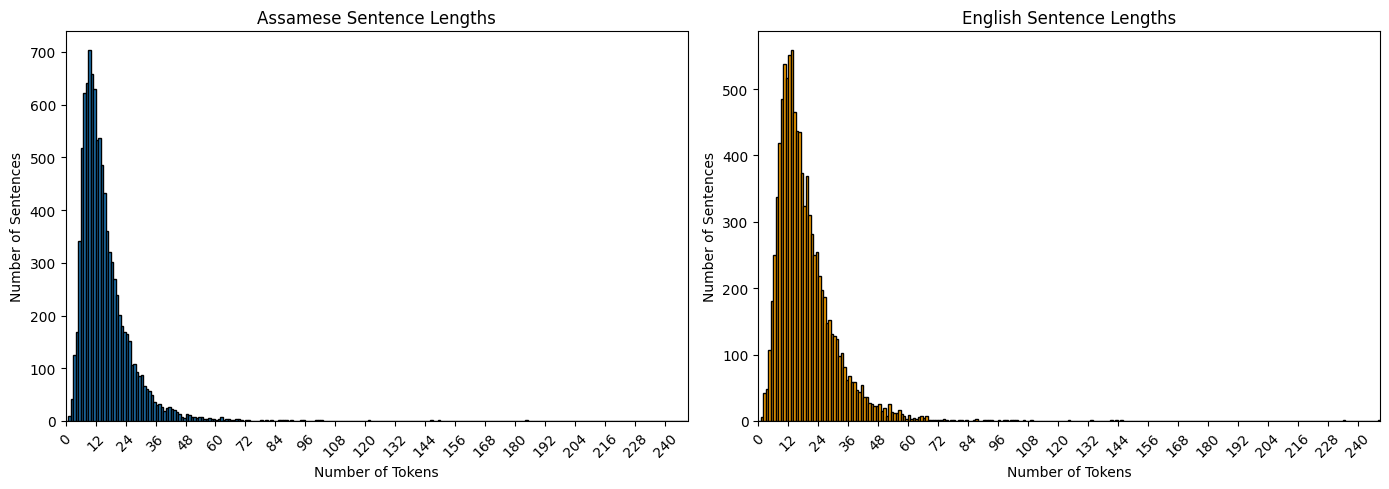

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 1) Make sure length columns exist
df['len_asm'] = df['asm'].apply(lambda x: len(str(x).split()))
df['len_eng'] = df['eng'].apply(lambda x: len(str(x).split()))

# 2) Determine the full max length in your data
max_len = max(df['len_asm'].max(), df['len_eng'].max())
print(f"Maximum sentence length in tokens: {max_len}")

# 3) Create bins for every integer length from 0 to max_len
bins = np.arange(0, max_len + 2)

# 4) Decide tick spacing so labels don’t crowd
tick_step = max(1, max_len // 20)
ticks = np.arange(0, max_len + 1, tick_step)

# 5) Plot side-by-side histograms
plt.figure(figsize=(14,5))

# Assamese
plt.subplot(1, 2, 1)
plt.hist(df['len_asm'], bins=bins, edgecolor='black')
plt.title('Assamese Sentence Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Sentences')
plt.xticks(ticks, rotation=45)
plt.xlim(0, max_len + 1)

# English
plt.subplot(1, 2, 2)
plt.hist(df['len_eng'], bins=bins, color='orange', edgecolor='black')
plt.title('English Sentence Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Sentences')
plt.xticks(ticks, rotation=45)
plt.xlim(0, max_len + 1)

plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import numpy as np

while True:
    try:
        min_token_length_str = input("Enter the MINIMUM token length you want to keep for sentences (e.g., 10): ")
        min_token_length = int(min_token_length_str)
        if min_token_length < 0:
            print("Please enter a non-negative integer for minimum length.")
            continue

        max_token_length_str = input("Enter the MAXIMUM token length you want to keep for sentences (e.g., 100): ")
        max_token_length = int(max_token_length_str)
        if max_token_length <= 0:
            print("Please enter a positive integer for maximum length.")
            continue

        if min_token_length > max_token_length:
            print(f"Error: Minimum length ({min_token_length}) cannot be greater than maximum length ({max_token_length}). Please try again.")
        else:
            break
    except ValueError:
        print("Invalid input. Please enter integer numbers for both lengths.")

print(f"\nFiltering sentences to keep those with both Assamese and English lengths between {min_token_length} and {max_token_length} tokens (inclusive).")

keep_mask = (df['len_asm'] >= min_token_length) & \
            (df['len_asm'] <= max_token_length) & \
            (df['len_eng'] >= min_token_length) & \
            (df['len_eng'] <= max_token_length)

# Filtered DataFrame: Contains sentences that meet the length criteria
df_filtered = df[keep_mask].copy()

# Removed DataFrame: Contains sentences that were filtered out (i.e., outside the specified range)
df_removed = df[~keep_mask].copy()

print(f"\nOriginal DataFrame size: {len(df)} rows")
print(f"Filtered DataFrame size (sentences kept within range): {len(df_filtered)} rows")
print(f"Removed DataFrame size (sentences outside range): {len(df_removed)} rows")

# --- Save to TSV files ---
output_filtered_file = f"filtered_dataset_from_{min_token_length}_to_{max_token_length}_tokens.tsv"
output_removed_file = f"removed_dataset_outside_{min_token_length}_to_{max_token_length}_tokens.tsv"
output_full_dataset_file = "complete_dataset_with_token_counts.tsv" # This file remains the same

# --- Prepare DataFrames for Saving with Descriptive Headers ---

# For the filtered and removed datasets (only 'asm' and 'eng' columns)
df_filtered_output = df_filtered[['asm', 'eng']].rename(columns={
    'asm': 'Assamese Sentence',
    'eng': 'English Sentence'
})
df_removed_output = df_removed[['asm', 'eng']].rename(columns={
    'asm': 'Assamese Sentence',
    'eng': 'English Sentence'
})

# For the complete dataset (including token counts)
df_complete_output = df[['asm', 'eng', 'len_asm', 'len_eng']].rename(columns={
    'asm': 'Assamese Sentence',
    'eng': 'English Sentence',
    'len_asm': 'Assamese Token Count',
    'len_eng': 'English Token Count'
})

# Save the filtered data (sentences within range)
df_filtered_output.to_csv(output_filtered_file, sep='\t', index=False, header=True)
print(f"\nSaved filtered data (within token range) to: {output_filtered_file}")

# Save the removed data (sentences outside range)
df_removed_output.to_csv(output_removed_file, sep='\t', index=False, header=True)
print(f"Saved removed data (outside token range) to: {output_removed_file}")

# Save the complete dataset with token counts
df_complete_output.to_csv(output_full_dataset_file, sep='\t', index=False, header=True)
print(f"Saved complete dataset with token counts to: {output_full_dataset_file}")

print("\nFiltering and saving complete.")

Enter the MINIMUM token length you want to keep for sentences (e.g., 10): 2
Enter the MAXIMUM token length you want to keep for sentences (e.g., 100): 48

Filtering sentences to keep those with both Assamese and English lengths between 2 and 48 tokens (inclusive).

Original DataFrame size: 9932 rows
Filtered DataFrame size (sentences kept within range): 9674 rows
Removed DataFrame size (sentences outside range): 258 rows

Saved filtered data (within token range) to: filtered_dataset_from_2_to_48_tokens.tsv
Saved removed data (outside token range) to: removed_dataset_outside_2_to_48_tokens.tsv
Saved complete dataset with token counts to: complete_dataset_with_token_counts.tsv

Filtering and saving complete.
